In [15]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# Read in file
happiness_df = pd.read_csv('world-happiness-report-2015-2022-cleaned.csv')
happiness_df

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [3]:
#complete data cleaning steps 

happiness_df.count()

Unnamed: 0                       1229
Happiness Rank                   1229
Country                          1229
Region                           1229
Happiness Score                  1229
Economy (GDP per Capita)         1229
Family (Social Support)          1229
Health (Life Expectancy)         1229
Freedom                          1229
Trust (Government Corruption)    1229
Generosity                       1229
Year                             1229
dtype: int64

In [4]:
happiness_df.dtypes 

Unnamed: 0                        int64
Happiness Rank                    int64
Country                          object
Region                           object
Happiness Score                  object
Economy (GDP per Capita)         object
Family (Social Support)          object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Year                              int64
dtype: object

In [5]:
# Removing all regions marked with no value "-"  -Tye
happiness_df.drop(happiness_df[happiness_df['Region'] == "-"].index, inplace = True)

In [6]:
#Converting Happiness Score to Float as some data contains (,) versus (.) as a decimal.
happiness_df["Happiness Score"] = happiness_df["Happiness Score"].str.replace(',','.').astype(float)
happiness_df["Economy (GDP per Capita)"] = happiness_df["Economy (GDP per Capita)"].str.replace(',','.').astype(float)
happiness_df["Health (Life Expectancy)"] = happiness_df["Health (Life Expectancy)"].str.replace(',','.').astype(float)
happiness_df["Family (Social Support)"] = happiness_df["Family (Social Support)"].str.replace(',','.').astype(float)
happiness_df["Freedom"] = happiness_df["Freedom"].str.replace(',','.').astype(float)
happiness_df["Trust (Government Corruption)"] = happiness_df["Trust (Government Corruption)"].str.replace(',','.').astype(float)
happiness_df["Generosity"] = happiness_df["Generosity"].str.replace(',','.').astype(float)



The GDP r-squared is: 0.5712687491416192
p value is : 1.960440415391026e-219


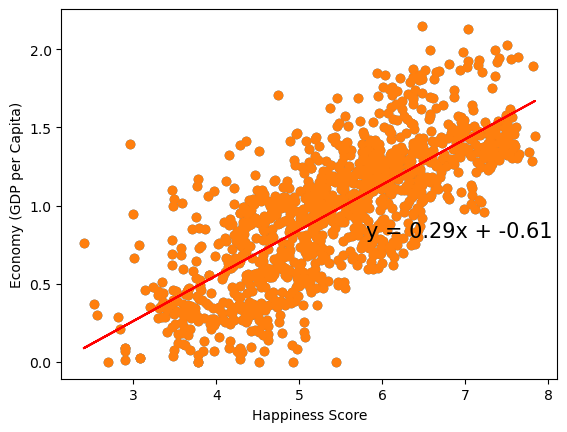

In [7]:

x_values = happiness_df['Happiness Score']
y_values = happiness_df['Economy (GDP per Capita)']
plt.scatter(x_values,y_values)
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
(slope, intercept, rvalue1, pvalue1, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
print(f"The GDP r-squared is: {rvalue1**2}")
print('p value is : ' + str(pvalue1))
plt.show()

The Social Support r-squared is: 0.39561509336796186
p value is : 2.70529408518711e-131


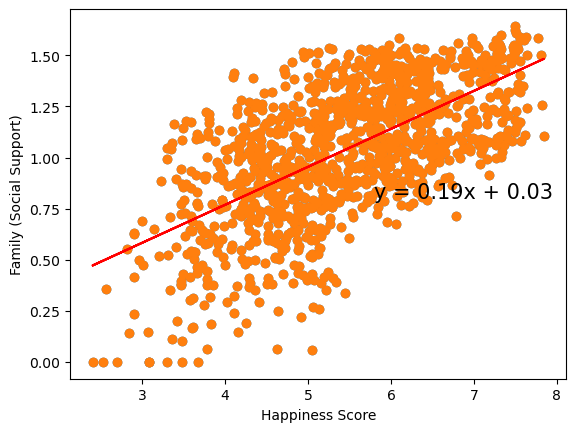

In [8]:

x_values = happiness_df['Happiness Score']
y_values = happiness_df['Family (Social Support)']
plt.scatter(x_values,y_values)
plt.xlabel('Happiness Score')
plt.ylabel('Family (Social Support)')
(slope, intercept, rvalue2, pvalue2, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
print(f"The Social Support r-squared is: {rvalue2**2}")
print('p value is : ' + str(pvalue2))
plt.show()


The Health r-squared is: 0.5314006425137255
p value is : 1.2914757066071022e-196


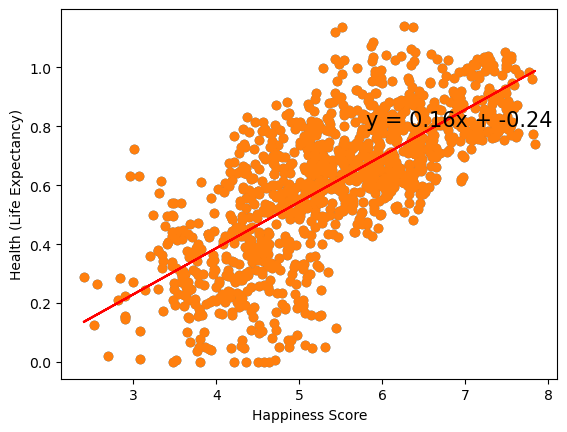

In [9]:
x_values = happiness_df['Happiness Score']
y_values = happiness_df['Health (Life Expectancy)']
plt.scatter(x_values,y_values)
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
(slope, intercept, rvalue3, pvalue3, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
print(f"The Health r-squared is: {rvalue3**2}")
print('p value is : ' + str(pvalue3))
plt.show()

The Health r-squared is: 0.3224591850946569
p value is : 5.99940550495387e-102
y = 0.08x + 0.01


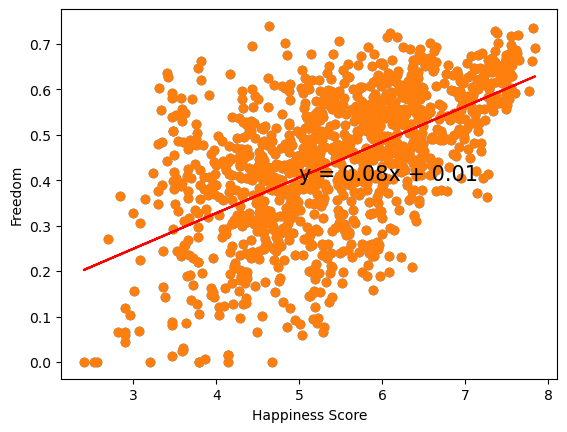

In [10]:
x_values = happiness_df['Happiness Score']
y_values = happiness_df['Freedom']
plt.scatter(x_values,y_values)
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
(slope, intercept, rvalue4, pvalue4, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0.4),fontsize=15,color="black")
print(f"The Health r-squared is: {rvalue4**2}")
print('p value is : ' + str(pvalue4))
print(line_eq)
plt.show()

The Trust r-squared is: 0.17968497366782882
p value is : 8.757718432813916e-53
y = 0.04x + -0.1


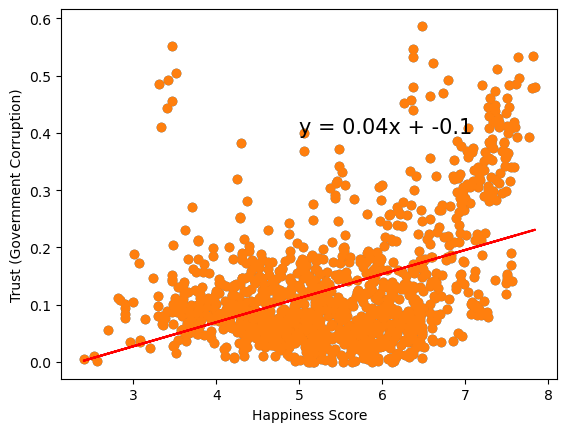

In [11]:
x_values = happiness_df['Happiness Score']
y_values = happiness_df['Trust (Government Corruption)']
plt.scatter(x_values,y_values)
plt.xlabel('Happiness Score')
plt.ylabel("Trust (Government Corruption)")
(slope, intercept, rvalue5, pvalue5, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0.4),fontsize=15,color="black")
print(f"The Trust r-squared is: {rvalue5**2}")
print('p value is : ' + str(pvalue5))
print(line_eq)
plt.show()

The Generosity r-squared is: 0.007721268550598212
p value is : 0.0024867286701248477
y = 0.01x + 0.15


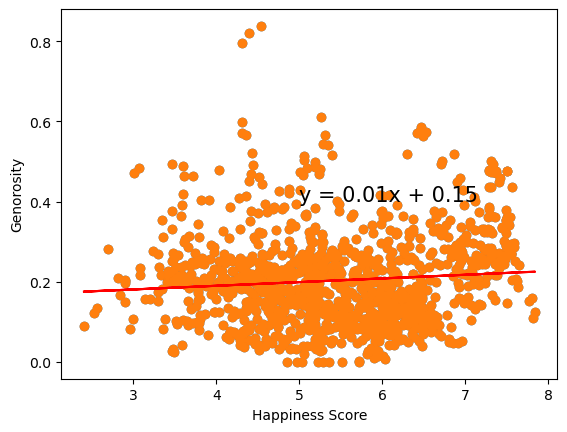

In [25]:
x_values = happiness_df['Happiness Score']
y_values = happiness_df['Generosity']
plt.scatter(x_values,y_values)
plt.xlabel('Happiness Score')
plt.ylabel("Genorosity")
(slope, intercept, rvalue6, pvalue6, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0.4),fontsize=15,color="black")
print(f"The Generosity r-squared is: {rvalue6**2}")
print('p value is : ' + str(pvalue6))
print(line_eq)
plt.show()